<a href="https://colab.research.google.com/github/sa1manhaidr/TSF-Internship/blob/main/Task_2_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                  **Spark Foundation Internship**

              TASK #1 : Unsupervised Machine Learning 
                Data Science and Business Analytics 
                    Method : K-Means Clustering  
                      Author : Salman Haider 


**TASK OBJECTIVE**
In this task, given Iris Dataset we have to predict the optimal number of clusters using elbow method in which we will calculate the WCSS(within cluster sum of squares)i.e. of each point and the centroid in a cluster.

To get the optimal number of clusters, we have to select the value of k at the “elbow” which is the point after the inertia start decreasing in a linear way.After we will visualize the clusters.

**IMPORTING REQUIRED LIBRARIES**

In [42]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualisation Libraries 
import seaborn as sns
import matplotlib.pyplot as plt


# Modelling  libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Error Handling Library
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline


**READING THE DATA **


In [43]:
# Load the iris dataset

df = pd.read_csv('Iris.csv')
df.drop(columns=['Id'], inplace=True)
df.head() # See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**DATA WRANGLING**

In [52]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
# Let's see how many examples we have of each species
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

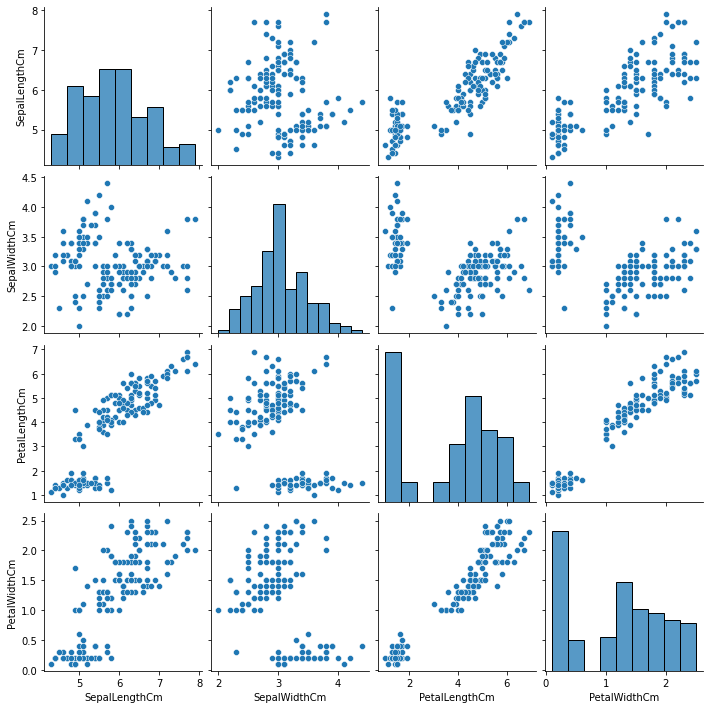

In [46]:
sns.pairplot(df)

**DATA PREPARATION**


In [47]:
# Setting the features SepalLengthCm, SepalLengthCm, SepalLengthCm and PetalWidthCm in x
x = df.iloc[:, [0, 1, 2, 3]].values
x.shape

(150, 4)

**FINDING THE OPTIMUM NUMBER OF CLUSTERS**

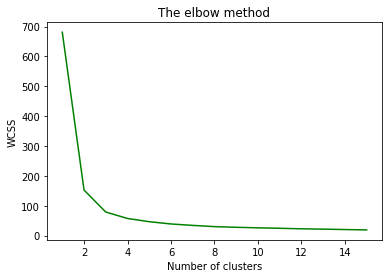

In [48]:

R = range(1, 16) # we started with 1 to avoid null cluster
wcss = []  # List created to store within cluster sum of squares (WCSS)

for i in R: 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting to observe 'The elbow'
plt.plot(R, wcss , c='g')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

OBSERVATION:

1.Inertia start decreasing in a linear way with a value of k equal to 3.

2.So, with K=3 we have obtained an optimal distortion/inertia with which we can segment the data into 3 different clusters with minimal error in segmentation.

**CREATING K-MEAN CLASSIFIER**


In [49]:
# Implementing the kmeans classifier to the dataset  
kmeans = KMeans(n_clusters = 3, random_state = 0) 

# Model fitting
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


**OBSERVATION**

1.kmeans.fit_predict method returns the array of cluster labels (0 ,1 ,2 ) on which  each data point belongs.

2.Next step we will get the species from generated labels . 

In [50]:
print(f'label 0 : {df.Species[y_kmeans == 0][4:5]}')
print(f'label 1 : {df.Species[y_kmeans == 1][4:5]}')
print(f'label 2 : {df.Species[y_kmeans == 2][4:5]}')

label 0 : 55    Iris-versicolor
Name: Species, dtype: object
label 1 : 4    Iris-setosa
Name: Species, dtype: object
label 2 : 103    Iris-virginica
Name: Species, dtype: object


**OBSERVATION**

1.label 0 for Iris-versicolor

2.label 1 for Iris-setosa

3.label 2 for Iris-virginica

**PLOTTING THE CLUSTERS**

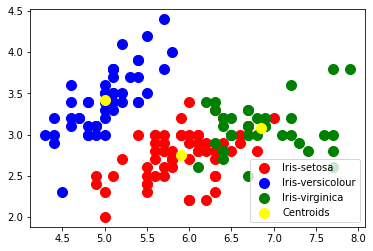

In [51]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1] ,  s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],  s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

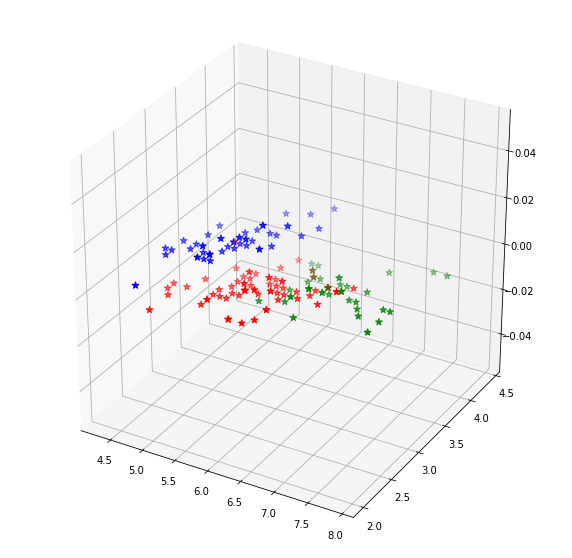

In [56]:
#3D Representation 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa', marker="*")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour', marker="*")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica', marker="*")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids', marker="*")
plt.show()

**Conclusion**

We have figured out the optimum number of clusters for the given iris dataset as 3 and also the clusters have been represented visually as a scattered plot.